<a href="https://colab.research.google.com/github/andypedre2016/Data-MIning-Class/blob/main/Create_and_Barrel_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Create and Barrel Project 



The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). We are selling millions of products worldwide every day, with several thousand products being added to our product line.

A consistent analysis of the performance of our products is crucial. However, due to our diverse global infrastructure, many identical products get classified differently. Therefore, the quality of our product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights we can generate about our product range.

 

For this competition, we have provided a dataset with 93 features for more than 200,000 products. The objective is to build a predictive model which is able to distinguish between our main product categories. The winning models will be open sourced.

Submission
You will submit your solution to Kaggle using the Late Submission button. In your github repository place your code and your Kaggle results (an image is fine). If your code is a Python Jupyter Notebook make sure you have a writeup explaining your solution. If your code is just a source code file, have an additional readme file outlining and discussing your solution.


XP is based on having a solution that works, how you place in Kaggle, and how you place relative to others in the class. For this project you can work with a partner if you wish. If you do work with a partner, make sure your writeup outlines what each of you contributed to the project.

In [150]:
#Importing the csv files
#Once imported, using the read_csv command to read them 

import pandas as pd

salesTrain = pd.read_csv('train.csv')
salesTest = pd.read_csv('test.csv')

#Using head() method to take a look at the dataset 
salesTrain.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [151]:
#Using head() method to take a look at the dataset 
salesTest.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [152]:
#taking a look at the shape of our data
print('test shape:', salesTest.shape)
print('train shape: ', salesTrain.shape)

test shape: (144368, 94)
train shape:  (61878, 95)


In [153]:
#Dividing the data into training and testing

#Gettin rid of the 'target' column(this will be the labels)
#Setting the rest of the columns as the features
sales_train_features = salesTrain.copy()
sales_train_features = sales_train_features.drop('target', axis = 1) 
#This would be all columns except for 'target' that is what i am trying to predict

#Setting the test dataset entirely to the test features
sales_test_features = salesTest

#getting the 'target' column and setting it as the traning labels
sales_train_labels = salesTrain[['target']]

#The test data set does not contain any labels 

sales_train_labels

,target
0,Class_1
1,Class_1
2,Class_1
3,Class_1
4,Class_1
...,...
61873,Class_9
61874,Class_9
61875,Class_9
61876,Class_9


In [160]:
#taking a look at the format of the our sets
print(sales_train_features.shape)
print(sales_train_labels.shape)
print(sales_test_features.shape)

(61878, 94)
(61878, 1)
(144368, 94)


In [155]:
#Im going to be using a XGBoost classifier to predict the products
from xgboost import XGBClassifier

#Creating a set of paramater which our model is going to be instantiated from
params = { "n_estimators": 400, 'tree_method':'gpu_hist', 'predictor':'gpu_predictor', 'max_depth': 6  }

#Instantiateing XGBoost model
model = XGBClassifier(**params)
model

XGBClassifier(max_depth=6, n_estimators=400, predictor='gpu_predictor',
              tree_method='gpu_hist')

In [156]:
#Using the train features and the train labels to train the Model 
model.fit(sales_train_features, sales_train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(max_depth=6, n_estimators=400, objective='multi:softprob',
              predictor='gpu_predictor', tree_method='gpu_hist')

In [157]:
from sklearn.metrics import accuracy_score
#Because I am going to be using a GXBoost classifier
# I need to One Hot Encode my data so I will get better accuracy score 

#importing OneHotEncoder from the sklearn library
from sklearn.preprocessing import OneHotEncoder

#Initialazing OneHotEncoder
ohe = OneHotEncoder(handle_unknown= 'ignore')


sales_test_features2 = salesTest
salesOHE = ohe.fit_transform(sales_test_features2)
salesOHE


#Getting the accuracy of the model
#Using the test features to test how well or the model predicts
sales_predictions = model.predict(sales_test_features2) #test features

So that is it for the classifier part, now the following lines are dedicated to formatting the data in the right way that the Kaggle competition requieres.

In [158]:
#First I need to get the id columns from the given data
#Getting id column and setting it to a variable to create a dataframe 
sub = salesTest[['id']]
sub

,id
0,1
1,2
2,3
3,4
4,5
...,...
144363,144364
144364,144365
144365,144366
144366,144367


In [159]:
#Here I am converting a numpy array into a data set
#the sales_predictions are the prediction that the model did over the test data set
#And those predictions are outputted in a list format
df = pd.DataFrame(sales_predictions, columns=  ['target'], index = sub['id'])
#My plan is that once I get the prediction in a dataframe then I can set the id as the index and at the end I will be able to save it as a csv file

#After getting the prediction in a dataframe
#Gettin the dummy values of the 'target' column
df = pd.get_dummies(df.target) #using get_dummies() method from pandas
df

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
id,,,,,,,,,
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
144364,0,0,0,0,0,0,0,0,1
144365,0,0,0,0,0,0,0,0,1
144366,0,0,0,0,0,0,0,0,1


In [148]:
df.to_csv('Submission_f.csv')

##This is a screenshoot of my result on the Kaggle website 

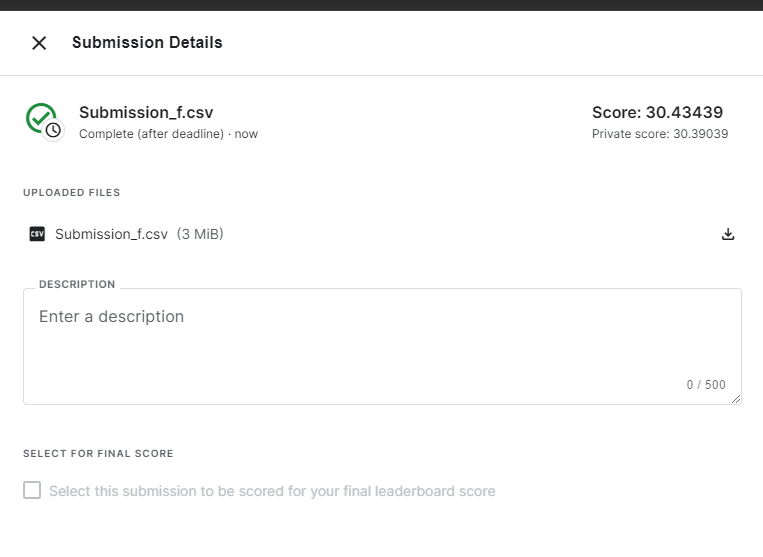